In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import losses
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
#príprava dát
data = pd.read_csv('Dataset.csv')
#oddelenie použitých stĺpcov 
C = data.iloc[:,2:16]
#pridanie stĺpcu "typ" ktorí vyjadruje značku deodorantu
C.loc[C['Product'] == "Deodorant B", 'typ'] = 0
C.loc[C['Product'] == "Deodorant F", 'typ'] = 1
C.loc[C['Product'] == "Deodorant G", 'typ'] = 2
C.loc[C['Product'] == "Deodorant H", 'typ'] = 3
C.loc[C['Product'] == "Deodorant J", 'typ'] = 4
#výber trénovacích dát, X_train sú stĺpce s dáta ktoré vyjadrujú hodnotenia používateľov od 1 do 5 , y_train obsahujú stĺpec "typ" ktorí je vyjadruje typ deodorantu v číselnej forme
# použité stĺpce v X_train q3_1_strength_of_the_Deodorant, q4_1_artificial_chemical, 
# q4_2_attractive. q4_3_bold, q4_4_boring, q4_5_casual, q4_6_cheap, q4_7_clean, q4_8_easy_to_wear, q4_9_elegant
X_train = C.iloc[:,4:14].values
y_train = C.iloc[:,14].values
# premenná y_train je premenená do tvaru jednotiek a núl
kategoricka_premenna = np_utils.to_categorical(y_train)

In [3]:
# konstruktor
model = Sequential()
# funkcia tahn presnosť cca 70 , relu presnosť 80 , elu najhoršia presnosť 45 pri 450 epochách
# vstupná vrstva , pri 50 neurónoch dostatočná presnosť. input_dim=10 povie v akom tvare vstupujú dáta. 
model.add(Dense(50, activation='relu', input_dim=10))
# skrytá vrstva , pri 200 neurónoch dostatočná presnosť , pri 100 neurónoch presnosť približne 65%
model.add(Dense(200, activation='relu'))
# výstupná vrstva
# pri použití funkcie softmax preznosť vzrástla približne o 5% a loss bol výrazne vyšší tiež v porovnaní s 
model.add(Dense(5, activation='sigmoid'))

sgd = SGD(lr=0.02)

#optimizer adam,Adadelta velmi nízka presnosť, problém po 150+ epochách .
#optimizer sgd najlepsia presnost
model.compile(loss=losses.categorical_crossentropy, optimizer="sgd", metrics=["accuracy"])
#epochs - množstvo prejdení po datasete, batch_size - velkosť skúmanej vzorky, verbose=1 príkaz na zobrazenie priebehu  
#pri použití binary_crossentropy je učenie podstatne rýchlejšie (do 10 epoch) ale výsledky pri predikcii sú horšie.
ucenie = model.fit(X_train, kategoricka_premenna,epochs=430, batch_size=10, verbose=1)

#hodnotenie presnosti
scores = model.evaluate(X_train,kategoricka_premenna)
print("\nAccuracy: %.2f%%" % (scores[1]*100))



Epoch 1/430
2500/2500 [==============================] - 1s 253us/step - loss: 1.6156 - acc: 0.1992
Epoch 2/430
2500/2500 [==============================] - 1s 220us/step - loss: 1.6102 - acc: 0.2040
Epoch 3/430
2500/2500 [==============================] - 0s 171us/step - loss: 1.6086 - acc: 0.2188
Epoch 4/430
2500/2500 [==============================] - 0s 155us/step - loss: 1.6075 - acc: 0.2232
Epoch 5/430
2500/2500 [==============================] - 0s 163us/step - loss: 1.6069 - acc: 0.2284
Epoch 6/430
2500/2500 [==============================] - 0s 153us/step - loss: 1.6057 - acc: 0.2240
Epoch 7/430
2500/2500 [==============================] - 0s 171us/step - loss: 1.6065 - acc: 0.2112
Epoch 8/430
2500/2500 [==============================] - 0s 165us/step - loss: 1.6059 - acc: 0.2228
Epoch 9/430
2500/2500 [==============================] - 0s 169us/step - loss: 1.6053 - acc: 0.2196
Epoch 10/430
2500/2500 [==============================] - 0s 157us/step - loss: 1.6044 - acc: 0.2340

2500/2500 [==============================] - 0s 171us/step - loss: 1.5499 - acc: 0.2984
Epoch 83/430
2500/2500 [==============================] - 0s 165us/step - loss: 1.5430 - acc: 0.3164
Epoch 84/430
2500/2500 [==============================] - 0s 147us/step - loss: 1.5469 - acc: 0.3068
Epoch 85/430
2500/2500 [==============================] - 0s 156us/step - loss: 1.5444 - acc: 0.2996
Epoch 86/430
2500/2500 [==============================] - 0s 158us/step - loss: 1.5401 - acc: 0.3136
Epoch 87/430
2500/2500 [==============================] - 0s 146us/step - loss: 1.5385 - acc: 0.3192
Epoch 88/430
2500/2500 [==============================] - 0s 153us/step - loss: 1.5398 - acc: 0.3136
Epoch 89/430
2500/2500 [==============================] - 0s 147us/step - loss: 1.5380 - acc: 0.3112
Epoch 90/430
2500/2500 [==============================] - 0s 146us/step - loss: 1.5344 - acc: 0.3124
Epoch 91/430
2500/2500 [==============================] - 0s 157us/step - loss: 1.5340 - acc: 0.3088
Epo

2500/2500 [==============================] - 0s 182us/step - loss: 1.3623 - acc: 0.4280
Epoch 163/430
2500/2500 [==============================] - 0s 163us/step - loss: 1.3595 - acc: 0.4360
Epoch 164/430
2500/2500 [==============================] - 0s 156us/step - loss: 1.3589 - acc: 0.4348
Epoch 165/430
2500/2500 [==============================] - 0s 142us/step - loss: 1.3613 - acc: 0.4308
Epoch 166/430
2500/2500 [==============================] - 0s 155us/step - loss: 1.3518 - acc: 0.4344
Epoch 167/430
2500/2500 [==============================] - 0s 145us/step - loss: 1.3415 - acc: 0.4376
Epoch 168/430
2500/2500 [==============================] - 0s 153us/step - loss: 1.3497 - acc: 0.4296
Epoch 169/430
2500/2500 [==============================] - 0s 152us/step - loss: 1.3415 - acc: 0.4496
Epoch 170/430
2500/2500 [==============================] - 0s 150us/step - loss: 1.3384 - acc: 0.4312
Epoch 171/430
2500/2500 [==============================] - 0s 187us/step - loss: 1.3330 - acc: 0

2500/2500 [==============================] - 0s 146us/step - loss: 1.1154 - acc: 0.5536
Epoch 243/430
2500/2500 [==============================] - 0s 151us/step - loss: 1.0988 - acc: 0.5604
Epoch 244/430
2500/2500 [==============================] - 0s 142us/step - loss: 1.0944 - acc: 0.5684
Epoch 245/430
2500/2500 [==============================] - 0s 154us/step - loss: 1.0865 - acc: 0.5644
Epoch 246/430
2500/2500 [==============================] - 0s 155us/step - loss: 1.1000 - acc: 0.5652
Epoch 247/430
2500/2500 [==============================] - 0s 144us/step - loss: 1.0970 - acc: 0.5544
Epoch 248/430
2500/2500 [==============================] - 0s 155us/step - loss: 1.0706 - acc: 0.5636
Epoch 249/430
2500/2500 [==============================] - 0s 153us/step - loss: 1.0825 - acc: 0.5700
Epoch 250/430
2500/2500 [==============================] - 0s 155us/step - loss: 1.0831 - acc: 0.5828
Epoch 251/430
2500/2500 [==============================] - 0s 174us/step - loss: 1.0692 - acc: 0

2500/2500 [==============================] - 0s 162us/step - loss: 0.8460 - acc: 0.6660
Epoch 323/430
2500/2500 [==============================] - 0s 144us/step - loss: 0.8526 - acc: 0.6652
Epoch 324/430
2500/2500 [==============================] - 0s 148us/step - loss: 0.8577 - acc: 0.6644
Epoch 325/430
2500/2500 [==============================] - 0s 164us/step - loss: 0.8383 - acc: 0.6620
Epoch 326/430
2500/2500 [==============================] - 0s 171us/step - loss: 0.8238 - acc: 0.6696
Epoch 327/430
2500/2500 [==============================] - 0s 158us/step - loss: 0.8324 - acc: 0.6676
Epoch 328/430
2500/2500 [==============================] - 0s 172us/step - loss: 0.8331 - acc: 0.6676
Epoch 329/430
2500/2500 [==============================] - 0s 174us/step - loss: 0.8303 - acc: 0.6692
Epoch 330/430
2500/2500 [==============================] - 0s 154us/step - loss: 0.8577 - acc: 0.6640
Epoch 331/430
2500/2500 [==============================] - 0s 142us/step - loss: 0.8246 - acc: 0

2500/2500 [==============================] - 1s 212us/step - loss: 0.6470 - acc: 0.7432
Epoch 403/430
2500/2500 [==============================] - 0s 192us/step - loss: 0.6378 - acc: 0.7604
Epoch 404/430
2500/2500 [==============================] - 0s 173us/step - loss: 0.6600 - acc: 0.7372
Epoch 405/430
2500/2500 [==============================] - 0s 157us/step - loss: 0.6278 - acc: 0.7544
Epoch 406/430
2500/2500 [==============================] - 0s 166us/step - loss: 0.6792 - acc: 0.7300
Epoch 407/430
2500/2500 [==============================] - 0s 156us/step - loss: 0.6467 - acc: 0.7544
Epoch 408/430
2500/2500 [==============================] - 0s 153us/step - loss: 0.6446 - acc: 0.7424
Epoch 409/430
2500/2500 [==============================] - 0s 171us/step - loss: 0.6403 - acc: 0.7472
Epoch 410/430
2500/2500 [==============================] - 0s 158us/step - loss: 0.6497 - acc: 0.7336
Epoch 411/430
2500/2500 [==============================] - 1s 202us/step - loss: 0.6193 - acc: 0

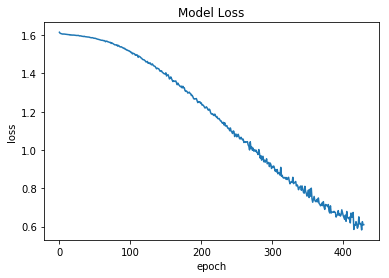

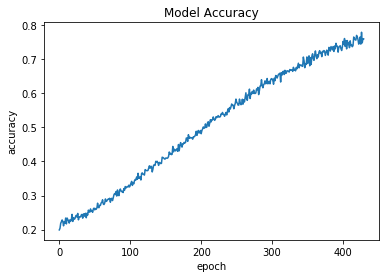

In [4]:
#priebeh strát výpočtov
plt.plot(ucenie.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#priebe presnosti výpočtov
plt.plot(ucenie.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

1/1 [==============================] - 0s 1ms/step
[[0.00483959 0.00000895 0.00046685 0.00000429 0.5022833 ]]


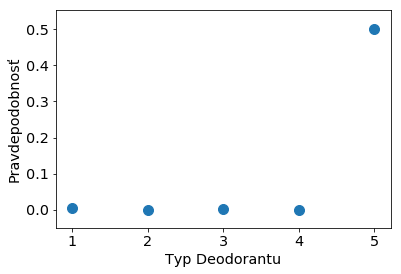

In [9]:
# predikcia typu deodorantu
import pylab
pred = np.array([[2, 5, 5, 4, 5, 2, 4, 3, 4, 5],])                                                 
predikcia = model.predict(pred,batch_size=1,verbose=1)
np.set_printoptions(suppress=True)
predictions = model.predict(pred)
print (predikcia)

# vykreslednie predikcie
# upravenie parametrov grafu
params = {'legend.fontsize': 'x-large',
          #(6, 4) rozmery grafu
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# vykreslienie grafu predikcie
def draw_multiple_points():

    # názvy na x osi
    x_number_list = [1, 2, 3, 4, 5]

    # hodnoty y osi
    y_number_list = predikcia

    # vykreslenie grafu podľa x a y
    pylab.scatter(x_number_list, y_number_list, s=100)



    # názvy osí a zobrazenie grafu
    pylab.xlabel("Typ Deodorantu")
    pylab.ylabel("Pravdepodobnosť")
    pylab.show()

if __name__ == '__main__':
    draw_multiple_points()

In [6]:
#model.save('deodorant_model.h5')